In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import activations

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
# for 2nd attempt
from keras.initializers import glorot_uniform
from keras.callbacks import EarlyStopping

import keras.backend as K

Using TensorFlow backend.


# Setting up and training a 1d Neural Network in tensorflow

## Aim
To learn the basic notation for implementing multi-layer artificial Neural Networks using Keras/TensorFlow. The function in this case is the curve: 

$f(x) = \sin(x)$

In [25]:
# let's choose a simple 1->1 function to train
def f(x):
    return np.sin(x)**2

In [26]:
# check it works...
print(f(np.pi/2))

1.0


In [29]:
# evaluate some data points
datasize = 5000
datapoints = np.linspace(-2,2,datasize)
datavalues = f(datapoints)
data = np.transpose([datapoints,datavalues])

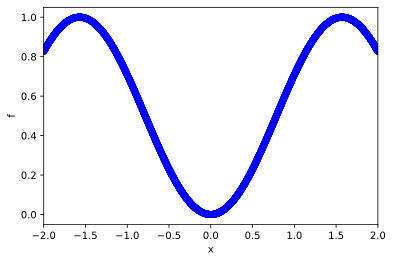

In [30]:
# plot the data points to see how they are distributed
plt.plot(datapoints, datavalues, 'bo')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

In [31]:
# Initialise model: 1-N-1
hiddenlayerdepth = 4
model = Sequential([
    Dense(hiddenlayerdepth, activation='tanh', input_shape=(1,)),
    Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error')

In [7]:
# demonstration of how to take slices of numpy arrays
print(data[0:2,0])
print(data[0:2,1])
print(f(1.20030495))

[-2.         -1.99919984]
[0.82682181 0.82742695]
0.8689027716812022


In [8]:
## split into testing and training sets 20:80
print(len(data))
split = int(len(data)*80/100)
print(split)

5000
4000


In [9]:
# fit the model with the data and save the information about the training
history = model.fit(
    data[0:split,0],
    data[0:split,1],
    epochs=150,
    validation_data=(data[split:,0], data[split:,1]),
    verbose=1
)

Train on 4000 samples, validate on 1000 samples
Epoch 1/150
4000/4000 [==============================] - 1s 149us/step - loss: 0.1888 - val_loss: 1.1248
Epoch 2/150
4000/4000 [==============================] - 0s 45us/step - loss: 0.0986 - val_loss: 0.9067
Epoch 3/150
4000/4000 [==============================] - 0s 39us/step - loss: 0.0946 - val_loss: 0.8138
Epoch 4/150
4000/4000 [==============================] - 0s 39us/step - loss: 0.0936 - val_loss: 0.8018
Epoch 5/150
4000/4000 [==============================] - 0s 39us/step - loss: 0.0926 - val_loss: 0.7749
Epoch 6/150
4000/4000 [==============================] - 0s 38us/step - loss: 0.0914 - val_loss: 0.7544
Epoch 7/150
4000/4000 [==============================] - 0s 38us/step - loss: 0.0901 - val_loss: 0.7691
Epoch 8/150
4000/4000 [==============================] - 0s 38us/step - loss: 0.0885 - val_loss: 0.7465
Epoch 9/150
4000/4000 [==============================] - 0s 38us/step - loss: 0.0862 - val_loss: 0.7210
Epoch 10/150
40

4000/4000 [==============================] - 0s 38us/step - loss: 0.0018 - val_loss: 0.0064
Epoch 79/150
4000/4000 [==============================] - 0s 38us/step - loss: 0.0017 - val_loss: 0.0058
Epoch 80/150
4000/4000 [==============================] - 0s 43us/step - loss: 0.0016 - val_loss: 0.0056
Epoch 81/150
4000/4000 [==============================] - 0s 40us/step - loss: 0.0016 - val_loss: 0.0040
Epoch 82/150
4000/4000 [==============================] - 0s 38us/step - loss: 0.0015 - val_loss: 0.0045
Epoch 83/150
4000/4000 [==============================] - 0s 38us/step - loss: 0.0014 - val_loss: 0.0036
Epoch 84/150
4000/4000 [==============================] - 0s 37us/step - loss: 0.0014 - val_loss: 0.0036
Epoch 85/150
4000/4000 [==============================] - 0s 41us/step - loss: 0.0013 - val_loss: 0.0030
Epoch 86/150
4000/4000 [==============================] - 0s 39us/step - loss: 0.0013 - val_loss: 0.0037
Epoch 87/150
4000/4000 [==============================] - 0s 39us/st

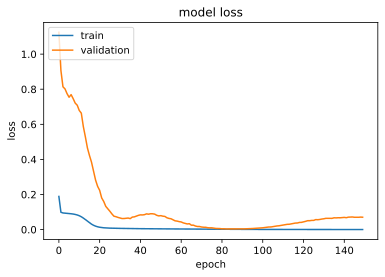

In [10]:
# now we can plot the history to see how the loss function for the
# training and validation set changed with epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [11]:
print(model.predict([1]))
print(f(1))

print(model.predict([0.1]))
print(f(0.1))

[[0.7036198]]
0.7080734182735712
[[0.01584393]]
0.009966711079379185


In [12]:
datapoints2 = np.linspace(-2,2,1000)
datavalues2 = f(datapoints2)
datavaluespred = model.predict(datapoints2)

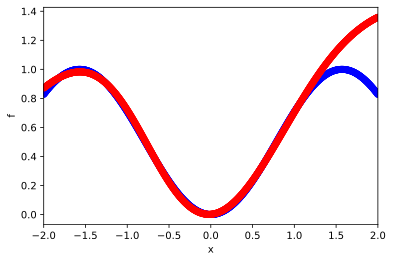

In [13]:
plt.plot(datapoints2, datavalues2, 'bo')
plt.plot(datapoints2, datavaluespred, 'ro')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

# Let's try again with a more complicated model

In [74]:
# try again with early stopping criteria
tf.keras.backend.clear_session()

In [75]:
# Initialise model: 1-16-16-1
model2 = Sequential([
    Dense(4, activation='tanh', input_shape=(1,)),
    Dense(4, activation='tanh', input_shape=(1,)),
    Dense(1)
])

model2.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error')

In [76]:
ES = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=100,
    verbose=1,
    restore_best_weights=True)

history2 = model2.fit(
    data[0:split,0],
    data[0:split,1],
    epochs=500,
    validation_data=(data[split:,0], data[split:,1]),
    callbacks=[ES],
    batch_size=128,
    verbose=0
)

Restoring model weights from the end of the best epoch
Epoch 00178: early stopping


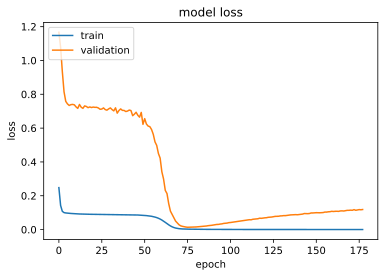

In [77]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

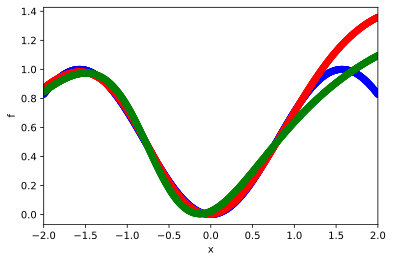

In [78]:
datavaluespred2 = model2.predict(datapoints2)

plt.plot(datapoints2, datavalues2, 'bo')
plt.plot(datapoints2, datavaluespred, 'ro')
plt.plot(datapoints2, datavaluespred2, 'go')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

# Questions

1. Is 5000 points a sensible sample size? How do the fits change if you reduce or increase the data set?
2. Is the 2nd model better of worse the the simple model with one hidden layer? What if we increase the number of nodes in the single hidden layer of the first model?
3. What does the argument 'batch_size' do? What is a good value that optimises the training?
4. Vary the early stopping parameters to see how they effect the training
5. What is the effect of changing the activation function?